## O conjunto de dados Reuters

* O conjunto de dados da Reuters éé composto de noticias curtas 1986. 
* É um conjunto de dados de _toy_ muito simples e amplamente usado para classificação de texto. 
* Existem 46 tópicos diferentes; alguns tópicos são mais representados do que outros, mas cada tópico tem pelo menos 10 exemplos no conjunto de treinamento.

In [1]:
from keras.datasets import reuters
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ranking = 10000

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print(len(train_data))
print(len(test_data))
print(train_labels)

2121728/2110848 [==============================] - 0s 0us/step
8982
2246
[ 3  4  3 ... 25  3 25]


/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


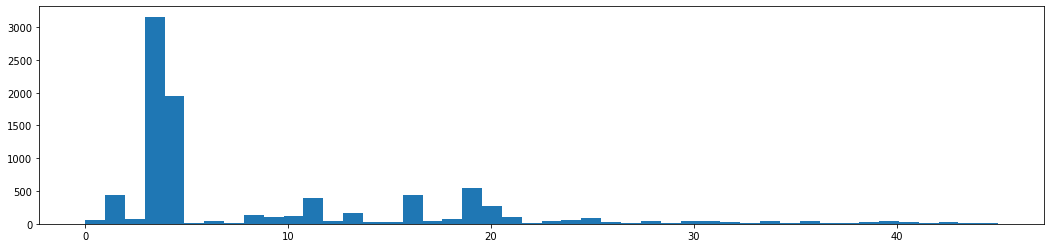

In [2]:
plt.figure(figsize=(18,4))
plt.hist(train_labels, bins=46)
plt.show()

In [3]:
word_index = reuters.get_word_index()
word_index.get('the')

565248/550378 [==============================] - 0s 0us/step


1

In [4]:
word_index.get('of')

2

In [5]:
word_index = reuters.get_word_index()


reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])


# Decodificamos a revisão; observe que nossos índices foram deslocados por 3
# porque 0, 1 e 2 são índices reservados para "padding", "start of sequence" 
# e "unknown". 

decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_newswire)

# Nota: Com os valores padrão do reuters.load_data() o índice 3 nunca é utilizado.

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


## Preparando os dados

Podemos vetorizar os dados exatamente com o mesmo código de nosso exemplo anterior

In [6]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, np.asarray(sequence)-1] = 1.
    return results

x_train = vectorize_sequences(train_data, ranking)
x_test = vectorize_sequences(test_data, ranking)

In [7]:
x_train.shape

(8982, 10000)

**One-hot nos rótulos**

In [8]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [9]:
one_hot_train_labels.shape

(8982, 46)

## Atividade

Experimente a seguinte rede neural mudando o parâmetro "ranking". Comente no final qual é a relação deste parâmetro com o modelo e com os resultados. 

Exemplos de valores para o parâmetro "ranking" poderiam ser: 100, 1000, 5000, 10000, 20000

In [10]:
from keras import models, Model
from keras import layers

def build_model(): 
    inputs = layers.Input(shape=(10000, )) # placeholder
    x = layers.Dense(128, activation='relu')(inputs)
    x = layers.Dense(64, activation='relu')( x )
    out = layers.Dense(46, activation='softmax')( x )

    model = Model(inputs=[inputs], outputs=[out], name="mnits_model")

    
    model.summary()
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

modelito = build_model()

Model: "mnits_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10000)]           0         
_________________________________________________________________
dense (Dense)                (None, 128)               1280128   
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 46)                2990      
Total params: 1,291,374
Trainable params: 1,291,374
Non-trainable params: 0
_________________________________________________________________


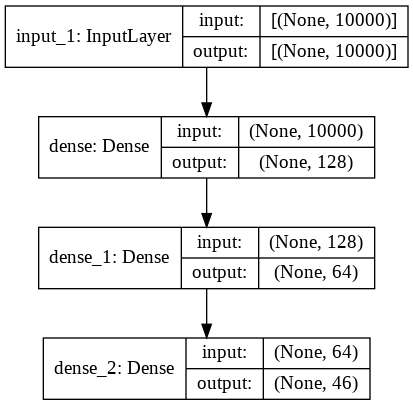

In [11]:
from tensorflow.keras.utils import plot_model

plot_model(modelito, show_shapes=True)

## Criando um conjunto de validação

In [12]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

print(x_val.shape,partial_x_train.shape)
print(y_val.shape,partial_y_train.shape)

(1000, 10000) (7982, 10000)
(1000, 46) (7982, 46)


## Treinamento

In [13]:
history = modelito.fit(partial_x_train, partial_y_train, epochs=8, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/8
16/16 [==============================] - 14s 42ms/step - loss: 2.8853 - accuracy: 0.4552 - val_loss: 1.4605 - val_accuracy: 0.6910
Epoch 2/8
16/16 [==============================] - 0s 16ms/step - loss: 1.2313 - accuracy: 0.7448 - val_loss: 1.1331 - val_accuracy: 0.7640
Epoch 3/8
16/16 [==============================] - 0s 16ms/step - loss: 0.8576 - accuracy: 0.8205 - val_loss: 0.9836 - val_accuracy: 0.8030
Epoch 4/8
16/16 [==============================] - 0s 15ms/step - loss: 0.6208 - accuracy: 0.8744 - val_loss: 0.9430 - val_accuracy: 0.8080
Epoch 5/8
16/16 [==============================] - 0s 15ms/step - loss: 0.4543 - accuracy: 0.9134 - val_loss: 0.8695 - val_accuracy: 0.8230
Epoch 6/8
16/16 [==============================] - 0s 15ms/step - loss: 0.3492 - accuracy: 0.9351 - val_loss: 0.8770 - val_accuracy: 0.8180
Epoch 7/8
16/16 [==============================] - 0s 16ms/step - loss: 0.2689 - accuracy: 0.9409 - val_loss: 0.8751 - val_accuracy: 0.8150
Epoch 8/8
16/16 [==

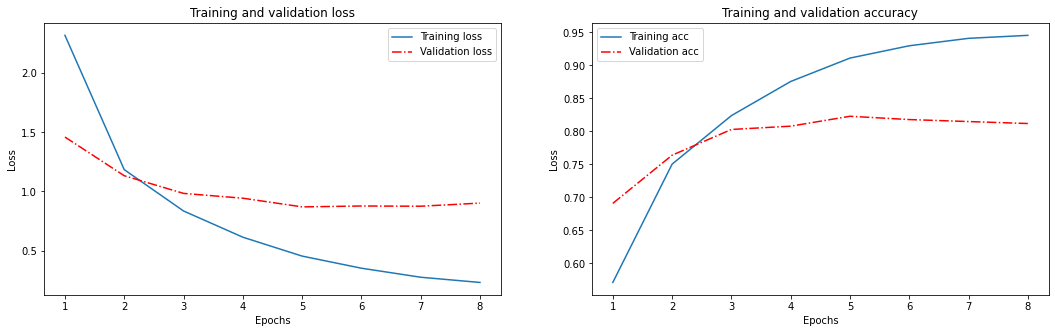

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, '-.r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, '-.r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Faça os comentários aqui:

1. Na primeira vez que rodei com 20 epochs, o treino rapidamente atingiu seu pico em trono do epochs 5 e 10, e embora depois disso tenha estabilizado, a acurácia caiu ligeiramente, e notei que a melhor acurácia se encontrava no epoch=8.

2. Fiz alguns testes com batch_size menor e maior, porém os resultados foram ligeiramente menores, mas nenhuma grande diferença. Rodei o treino novamente com epoch=8 para tentar atingir a melhor acurácia possível, e consegui ~81%.
